In [38]:
# # Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# # ms-python.python added
import os
from pathlib import Path

# os.getcwd()
try:
	os.chdir(os.path.join(str(Path.home()), "GRN_INFERENCE_IY/scripts-notebooks"))
except Exception as e:
	print(e)

In [40]:
# Import stuff
import pandas as pd
import numpy as np

In [41]:
import os
ko_gold_df = pd.read_csv("../dataset/yeast_networks/gold/MacIsaac2.KO.txt", sep = '\t', header = None, names = ['Regulator', 'Target'])
nv_gold_df = pd.read_csv("../dataset/yeast_networks/gold/MacIsaac2.NatVar.txt", sep = '\t', header = None, names = ['Regulator', 'Target'])
stress_gold_df = pd.read_csv("../dataset/yeast_networks/gold/MacIsaac2.Stress.txt", sep = '\t', header = None, names = ['Regulator', 'Target'])

gold_df = ko_gold_df.merge(nv_gold_df, how='outer', left_on=['Regulator', 'Target'], right_on=['Regulator', 'Target'])
gold_df = gold_df.merge(stress_gold_df, how='outer', left_on=['Regulator', 'Target'], right_on=['Regulator', 'Target'])

In [42]:
# Get expression data
ko_df = pd.read_csv('../dataset/yeast_networks/expression/KO.txt', sep='\t').set_index('Gene')
nv_df = pd.read_csv('../dataset/yeast_networks/expression/NatVar.txt', sep='\t').set_index('Gene')
stress_df = pd.read_csv('../dataset/yeast_networks/expression/Stress.txt', sep='\t').set_index('Name')

# Get Transcription Factors
ko_tf = pd.read_csv('../dataset/yeast_networks/expression/KO_TF_names.txt', sep='\t', header=None)
ko_tf.columns = ['TF']

nv_tf = pd.read_csv('../dataset/yeast_networks/expression/NatVar_TF_names.txt', sep='\t', header=None)
nv_tf.columns = ['TF']

stress_tf = pd.read_csv('../dataset/yeast_networks/expression/Stress_TF_names.txt', sep='\t', header=None)
stress_tf.columns = ['TF']

# Note that there are different gene list for each df, so we will use ko as test for now.

In [10]:
## Examine gold

In [52]:
gold_common_df = ko_gold_df.merge(nv_gold_df, how='inner', left_on=['Regulator', 'Target'], right_on=['Regulator', 'Target'])
gold_common_df = gold_common_df.merge(stress_gold_df, how='inner', left_on=['Regulator', 'Target'], right_on=['Regulator', 'Target'])

In [59]:
# Randomly sample N edges in KO gold
N = 5

indices = np.random.randint(gold_common_df.shape[0], size=N)
indices = [True if i in indices else False for i in range(gold_common_df.shape[0])]
gold_samples = gold_common_df.loc[indices]

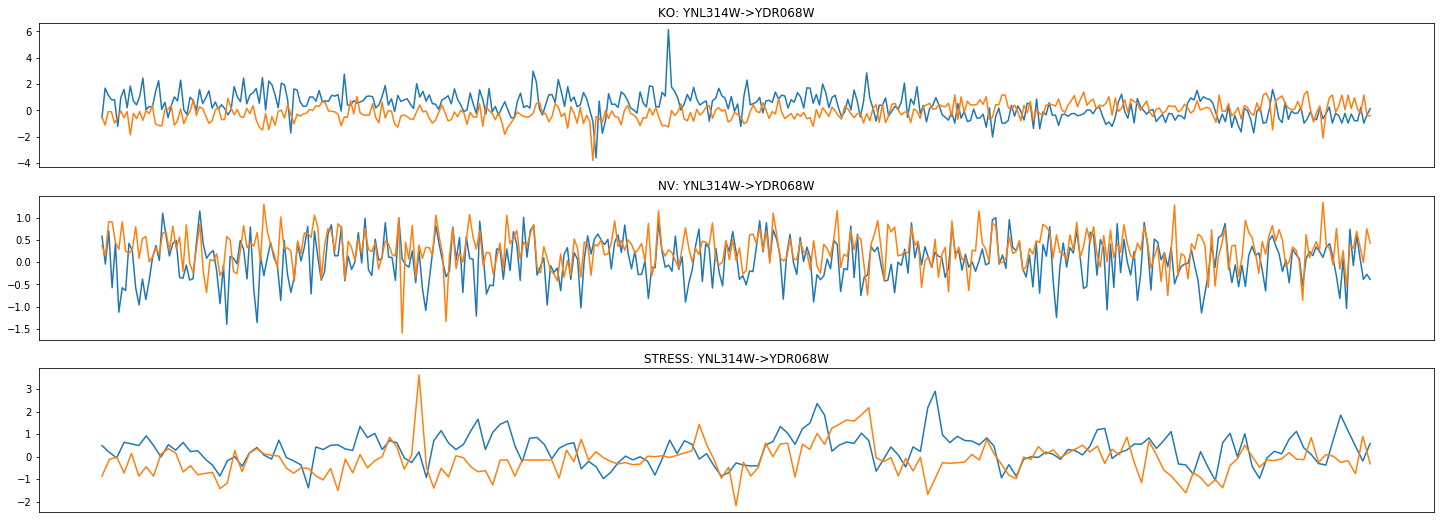

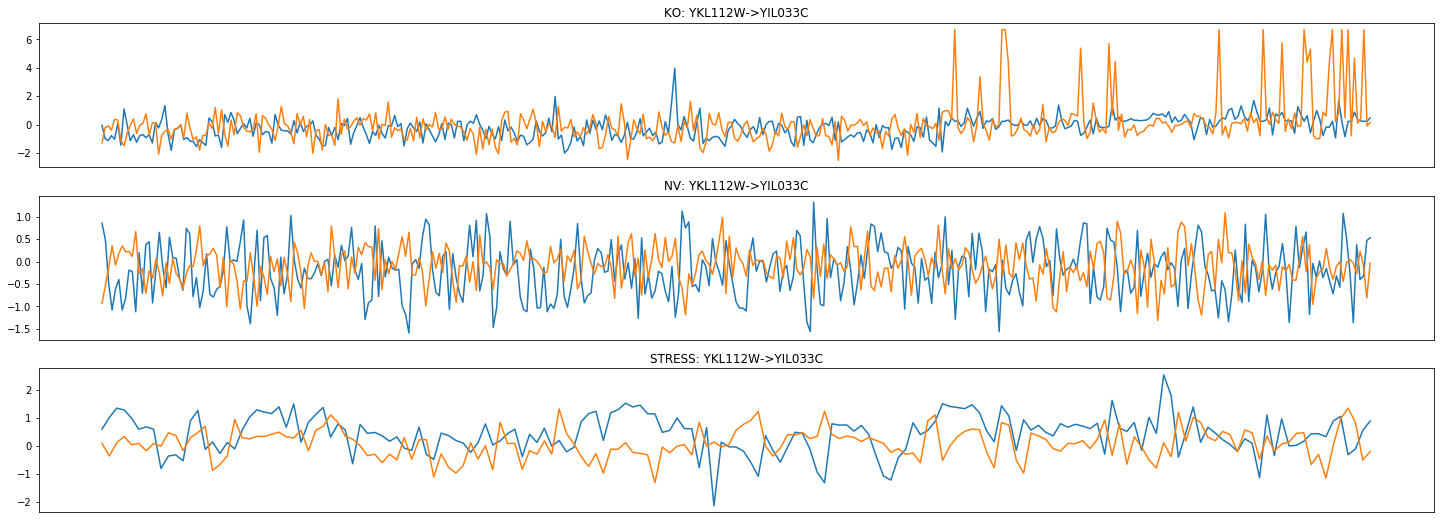

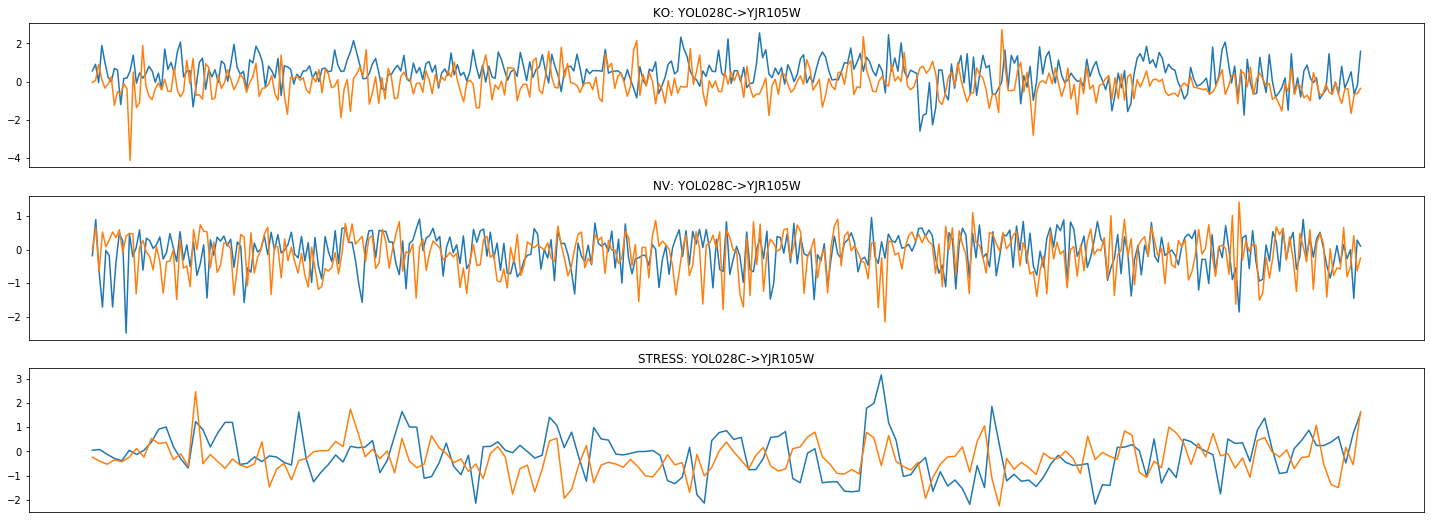

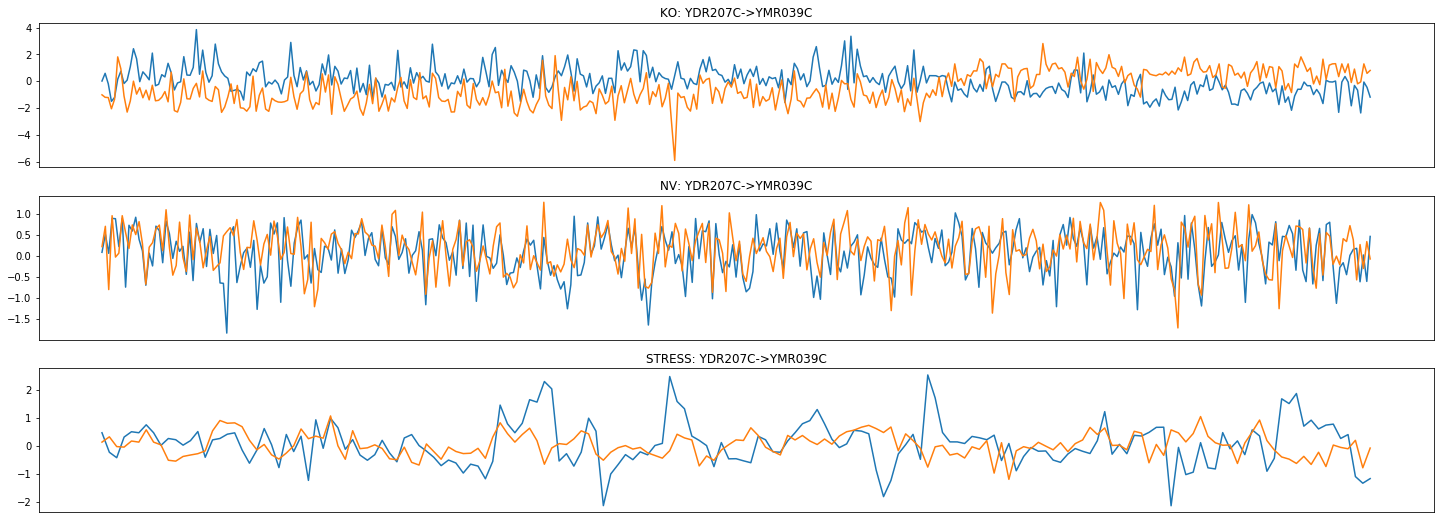

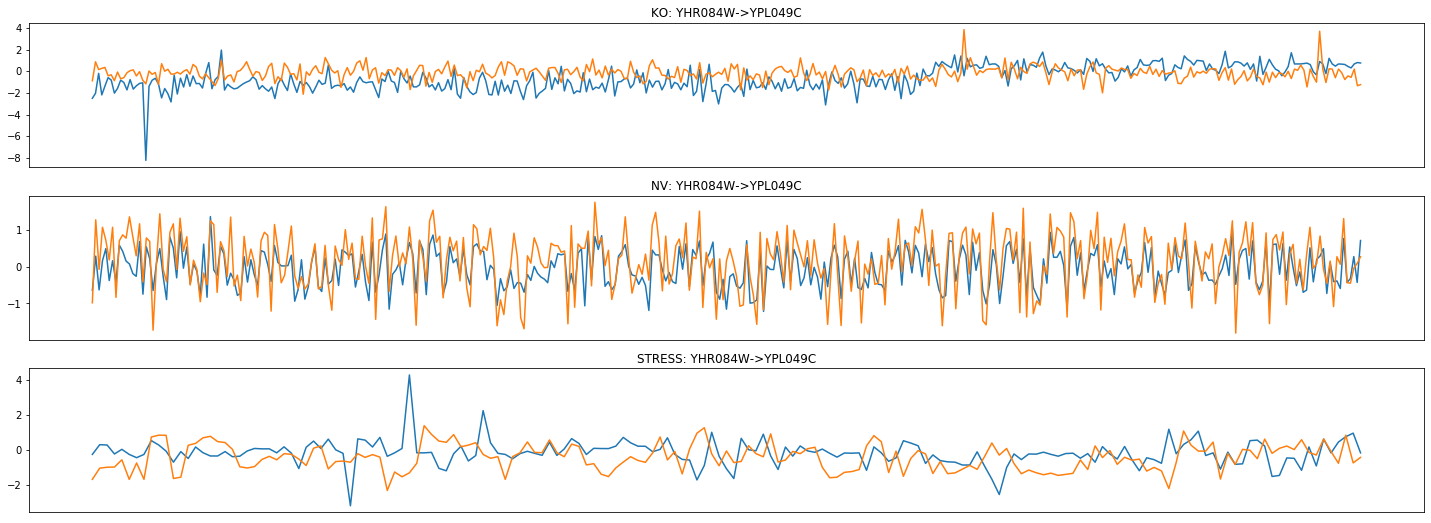

In [64]:
import matplotlib.pyplot as plt

for i in range(N):
    fig, ax = plt.subplots(3, 1, figsize=(25,3*3))
    target, regulator = gold_samples.iloc[i]['Target'], gold_samples.iloc[i]['Regulator']
    
    ax[0].plot(ko_df.columns, ko_df.loc[target].values, ko_df.columns, ko_df.loc[regulator].values)
    ax[0].xaxis.set_visible(False)
    ax[0].set_title(f"KO: {regulator}->{target}")

    ax[1].plot(nv_df.columns, nv_df.loc[target].values, nv_df.columns, nv_df.loc[regulator].values)
    ax[1].xaxis.set_visible(False)
    ax[1].set_title(f"NV: {regulator}->{target}")
    
    ax[2].plot(stress_df.columns, stress_df.loc[target].values, stress_df.columns, stress_df.loc[regulator].values)
    ax[2].xaxis.set_visible(False)
    ax[2].set_title(f"STRESS: {regulator}->{target}")

    # fig.savefig(f"./graphs/{regulator}->{target}.png")